# Part II - Factors affecting BorrowersAPR and Loan Amount
# (Exploring Loan Data from Prosper)

## by Ibiyinka Daramola




## Investigation Overview

In these investigation, I want to look at the most important factors that influence BorrowersAPR and Loan Amount. The main focus wil be on the Income Range and the ProsperScore



## Dataset Overview


This data set contains 113,937 loans with 81 variables on each loan from a loan company called Prosper. The variables include loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.Only 15 variables were retained as the ones of interest

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe

loan= pd.read_csv('prosperLoanData.csv')

In [19]:
# creating a copy of the original data
loan_clean= loan.copy()

In [20]:
# Selecting only 15 columns (variables) that will be used for analysis


loan_clean = loan_clean[['ListingKey',
'ListingCreationDate',
'Term',
'LoanStatus',
'BorrowerAPR',
'ProsperScore',
'BorrowerState',
'Occupation',
'EmploymentStatus',
'IsBorrowerHomeowner',
'IncomeRange',
'TotalProsperLoans',
'OnTimeProsperPayments',
'LoanOriginalAmount',
'LoanOriginationDate']
]

In [21]:
# change ListingCreationDate and LoanOriginationDate to datetime datatype

loan_clean[['ListingCreationDate','LoanOriginationDate']]= loan_clean[['ListingCreationDate','LoanOriginationDate']].apply(pd.to_datetime)

In [22]:
# change Prosper Score dtype from float to string

loan_clean.ProsperScore = loan_clean.ProsperScore.astype(str)

In [23]:
# Replace Prosper score of 11 with 10
loan_clean['ProsperScore'].replace([11.0] , [10.0], inplace=True)

In [24]:
# Change income range and ProsperScore to ordered categorical variable

ord_var_dict= {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                'ProsperScore' : ['nan','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']}

for var in ord_var_dict:
    ord_var=pd.api.types.CategoricalDtype(ordered=True, categories=ord_var_dict[var])
    loan_clean[var]= loan_clean[var].astype(ord_var)

In [25]:
# Let's create lists for the Numeric and the categorical variables of inteterest

numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'ProsperScore']

# Distribution of BorrowerAPR

The BorrowerAPR has a small range of values (about 0.01-0.43) with a lot of data points. An histogram plot shows a roughly normal distribution with some high outliers close to 0 and around 0.35-0.37 APR values

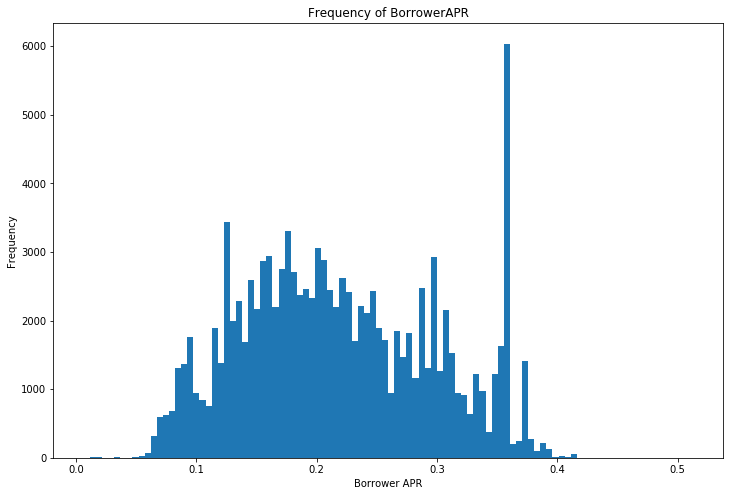

In [26]:
plt.figure(figsize=[12,8])
loan_clean.BorrowerAPR.plot.hist(bins=100)
plt.title('Frequency of BorrowerAPR')
plt.xlabel('Borrower APR');

# Distribution of LoanOriginalAmount

An histogram of this showed a skewness of the data to the right. It also revealed notable peaks at certain intervals suggestive that standard loan amounts are ususally given which are sometimes varied.


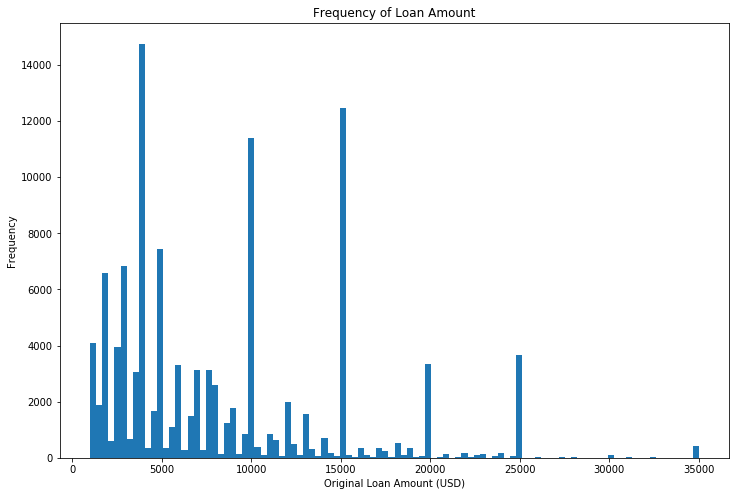

In [27]:
plt.figure(figsize=[12,8])
loan_clean.LoanOriginalAmount.plot.hist(bins=100)
plt.title('Frequency of Loan Amount')
plt.xlabel('Original Loan Amount (USD)');

# BorrowerAPR vs LoanOriginalAmount

Plotting BorrowerAPR vs LoanOriginalAmount reveals an aproximate inverse relationship. 
There is a notable concentration of data points below a certain loanamount(\\$15,000) and at certain intervals(of about \\$5000)

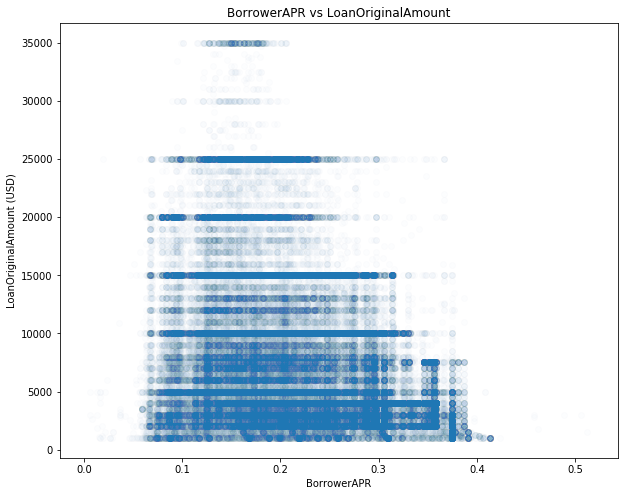

In [28]:
plt.figure(figsize=[10,8])
plt.scatter(data=loan_clean, x='BorrowerAPR', y='LoanOriginalAmount', alpha =1/100)
plt.title('BorrowerAPR vs LoanOriginalAmount')
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount (USD)');

# Categorical Variables vs BorrowerAPR 

Amongst other information, the violin plots reveal: 
    
- More homeowners had lower BorrowerAPR
- Higher income ranges had lower BorrowerAPRs
- BorrowerAPR fell with increasing ProsperScores

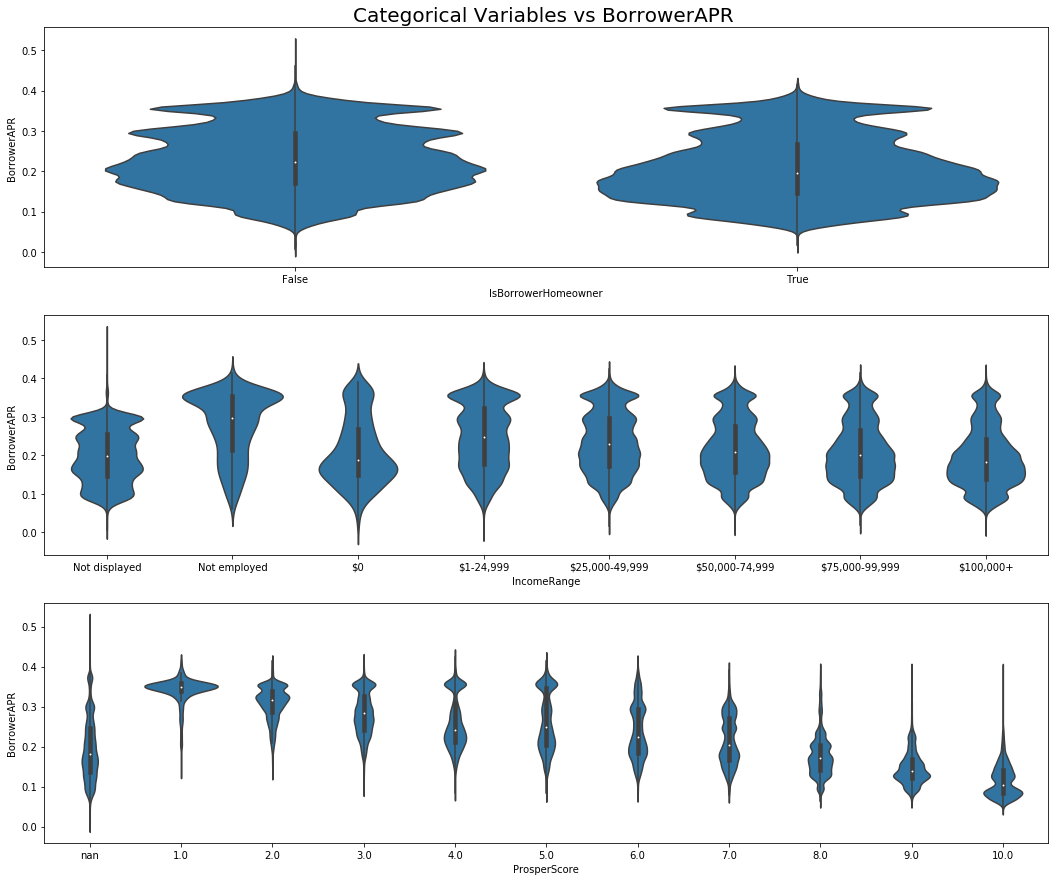

In [29]:

# Let's make violin plots of the some categorical variables vs BorrowerAPR

plt.figure(figsize = [18, 15])

default_color = sb.color_palette()[0]

# subplot 1: 'IsBorrowerHomeowner' vs. 'BorrowerAPR'
ax = plt.subplot(3, 1, 1)
sb.violinplot(data = loan_clean, x = 'IsBorrowerHomeowner', y ='BorrowerAPR', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping
plt.title('Categorical Variables vs BorrowerAPR ', fontsize=20)

# subplot 2: 'IncomeRange' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 2)
sb.violinplot(data = loan_clean, x = 'IncomeRange', y ='BorrowerAPR', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: 'ProsperScore' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 3)
sb.violinplot(data = loan_clean, x = 'ProsperScore', y ='BorrowerAPR', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping



# Categorical Variables vs OriginalLoanAmount
The violin plots reveal:

- Those without homes took larger original loan amounts
- Higher income ranges took higher loan original amount
- Original loan amount increased with increasing ProsperScore
- These will be further explored in the multivariate analysis

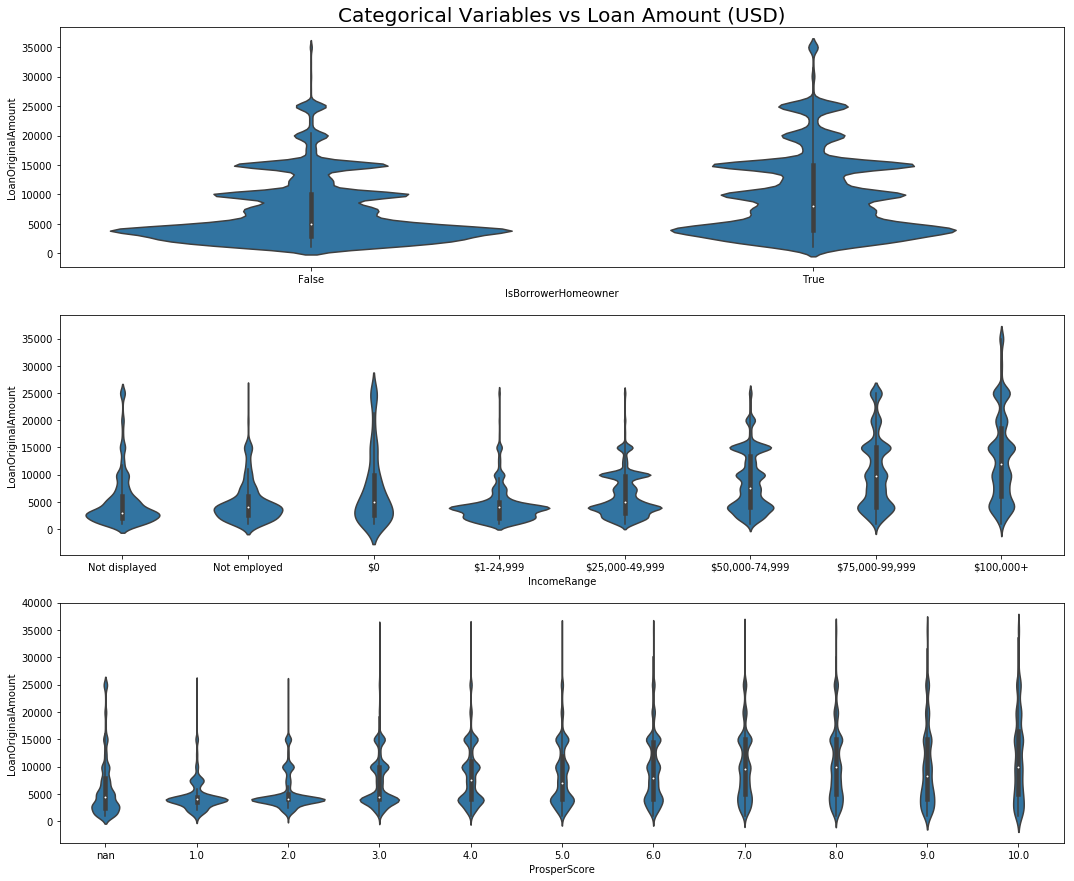

In [30]:
# Let's make violin plots again of the same categorical variables but this time against LoanOriginalAmount

plt.figure(figsize = [18, 15])

default_color = sb.color_palette()[0]

# subplot 1: 'IsBorrowerHomeowner' vs. 'LoanOriginalAmount'
ax = plt.subplot(3, 1, 1)
sb.violinplot(data = loan_clean, x = 'IsBorrowerHomeowner', y ='LoanOriginalAmount', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping
plt.title('Categorical Variables vs Loan Amount (USD)', fontsize=20)

# subplot 2: 'IncomeRange' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 2)
sb.violinplot(data = loan_clean, x = 'IncomeRange', y ='LoanOriginalAmount', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: 'ProsperScore' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 3)
sb.violinplot(data = loan_clean, x = 'ProsperScore', y ='LoanOriginalAmount', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping



plt.show()

# BorrowerAPR vs LoanOriginalAmount vs ProsperScore
A scatter plot with a color bar is used to make this multivariate plot

The plot shows that BorrowerAPR increases with falling ProsperScore and Loan Amount

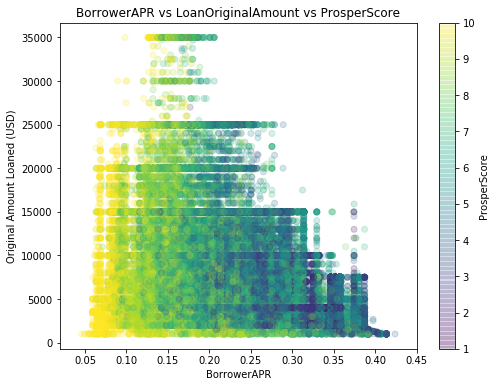

In [31]:
# Let's use a scatter plot with a color bar

plt.figure(figsize=(8,6))
plt.scatter(data = loan_clean, x ='BorrowerAPR' , y = 'LoanOriginalAmount',
                c = 'ProsperScore', alpha=1/5)
plt.colorbar(label = 'ProsperScore')
plt.xlabel('BorrowerAPR')
plt.title('BorrowerAPR vs LoanOriginalAmount vs ProsperScore', fontsize=12)
plt.ylabel('Original Amount Loaned (USD)');

# Summary
- BorrowerAPR falls with increasing incomerange and prosper score

- LoanOriginalAmount increases with increasing incomerange and Prosperscore


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_Prosper_Loan_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan_slide_deck.ipynb to slides
[NbConvertApp] Writing 1036420 bytes to Part_II_Prosper_Loan_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Prosper_Loan_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 7